(-0.5, 753.5, 1007.5, -0.5)

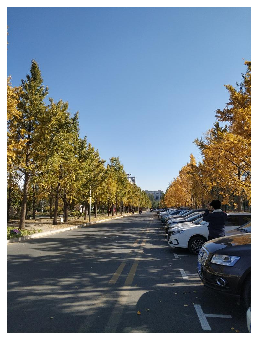

In [10]:
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
pic = imageio.imread('../Image/tree_small.jpg')
plt.figure(figsize = (6,6))
plt.imshow(pic)
plt.axis('off')

(-0.5, 753.5, 1007.5, -0.5)

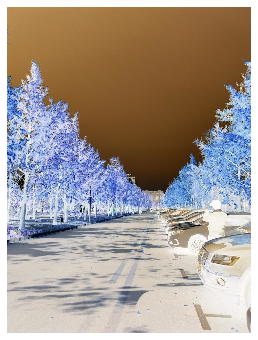

In [11]:
negative = 255 - pic
plt.figure(figsize=(6,6))
plt.imshow(negative)
plt.axis('off')

(-0.5, 753.5, 1007.5, -0.5)

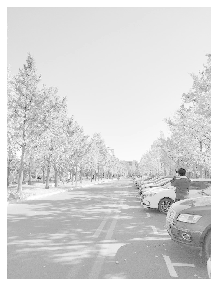

In [12]:
import numpy as np
gray = lambda rgb : np.dot(rgb[... , :3], [0.299, 0.587, 0.114])
gray = gray(pic)
max_ = np.max(gray)
def log_transform():
    return (255/np.log(1+max_)) * np.log(1+gray)
plt.figure(figsize = (5,5))
plt.imshow(log_transform(), cmap = plt.get_cmap(name = 'gray'))
plt.axis('off')

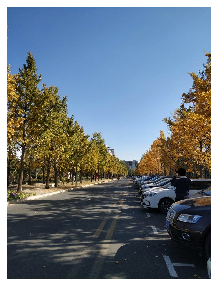

In [13]:
gamma = 0.9
gamma_correction = ((pic/255)**(1/gamma))
plt.figure(figsize=(5,5))
plt.imshow(gamma_correction)
plt.axis('off');

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


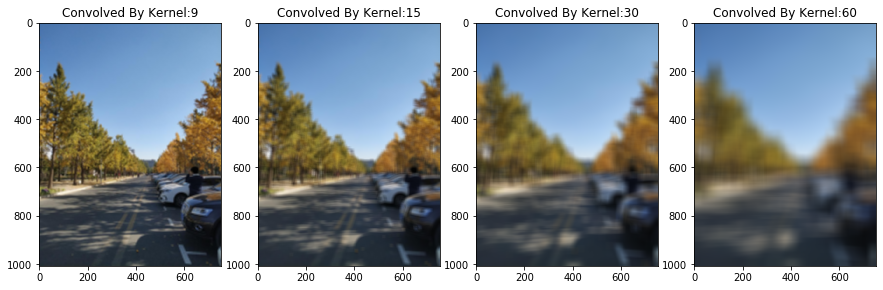

In [14]:
%time
from scipy.signal import convolve2d
def Convolution(image, kernel):
    conv_bucket = []
    for d in range(image.ndim):
        conv_channel = convolve2d(image[:,:,d], kernel, mode='same', boundary='symm')
        conv_bucket.append(conv_channel)
    return np.stack(conv_bucket, axis=2).astype('uint8')
kernel_sizes = [9,15,30,60]
fig, axs = plt.subplots(nrows = 1, ncols = len(kernel_sizes), figsize=(15,15));
for k, ax in zip(kernel_sizes, axs):
    kernel = np.ones((k,k))
    kernel /= np.sum(kernel)
    ax.imshow(Convolution(pic, kernel))
    ax.set_title("Convolved By Kernel:{}".format(k))
        

In [5]:
import os 
from PIL import Image
import re
im = Image.open('../Image/tree.jpg')
w, h = im.size
print(w,h)

4032 3016


In [9]:
w_new = int(w/4)
h_new = int(h/4)
out = im.resize((w_new,h_new),Image.ANTIALIAS)
out.show()
out.save('../Image/tree_small.jpg')

CPU times: user 139 ms, sys: 7.99 ms, total: 147 ms
Wall time: 84.1 ms


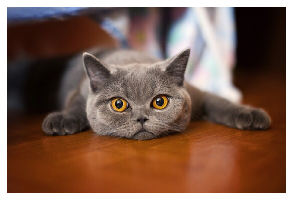

In [16]:
%%time
from skimage import color
from skimage import exposure
import numpy as np
import imageio
import matplotlib.pyplot as plt

pic_cat = imageio.imread('../Image/cat.jpeg')
plt.figure(figsize = (5,5))
plt.imshow(pic_cat)
plt.axis('off')

/home/chao/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


(-0.5, 1197.5, 796.5, -0.5)

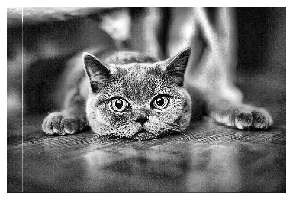

In [18]:
img = color.rgb2gray(pic_cat)
kernel = np.array([[-1,-1,-1],
                   [-1,8,1],
                   [-1,-1,-1]])
edges = convolve2d(img, kernel, mode='valid')
edges_equalized=exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit =0.03)
plt.figure(figsize=(5,5))
plt.imshow(edges_equalized, cmap='gray')
plt.axis('off')